In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kaggle-survey-2022/kaggle_survey_2022_responses.csv
/kaggle/input/kaggle-survey-2022/Supplementary Data/kaggle_survey_2022_methodology.pdf
/kaggle/input/kaggle-survey-2022/Supplementary Data/kaggle_survey_2022_answer_choices.pdf


# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading and cleaning Data

In [3]:
df= pd.read_csv("/kaggle/input/kaggle-survey-2022/kaggle_survey_2022_responses.csv")
df

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (0,208,225,255,257,260,270,271,277) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23993,331,22-24,Man,United States of America,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
23994,330,60-69,Man,United States of America,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
23995,860,25-29,Man,Turkey,No,NaN,NaN,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
23996,597,35-39,Woman,Israel,No,NaN,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(df.columns)

Index(['Duration (in seconds)', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6_1', 'Q6_2', 'Q6_3',
       'Q6_4', 'Q6_5',
       ...
       'Q44_3', 'Q44_4', 'Q44_5', 'Q44_6', 'Q44_7', 'Q44_8', 'Q44_9', 'Q44_10',
       'Q44_11', 'Q44_12'],
      dtype='object', length=296)


In [5]:
df = df.tail(df.shape[0] -1)
df

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
5,232,45-49,Man,India,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23993,331,22-24,Man,United States of America,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
23994,330,60-69,Man,United States of America,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
23995,860,25-29,Man,Turkey,No,NaN,NaN,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
23996,597,35-39,Woman,Israel,No,NaN,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df= df.reset_index()


# Visualising Data

In [7]:
age_count= pd.DataFrame(df['Q2'].value_counts())
age_count

,Q2
18-21,4559
25-29,4472
22-24,4283
30-34,2972
35-39,2353
40-44,1927
45-49,1253
50-54,914
55-59,611
60-69,526


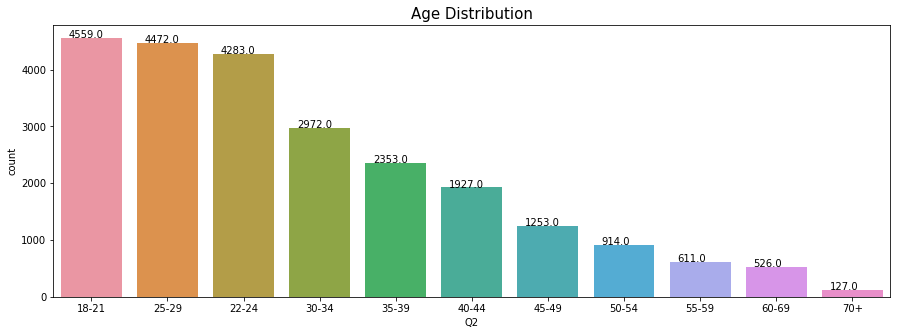

In [8]:
color_palette = sns.color_palette("tab10")
sns.set_palette(color_palette)
plt.figure(figsize=(15,5))
age= sns.countplot(x=df["Q2"],order = df['Q2'].value_counts().index)
plt.title('Age Distribution', fontsize=15)
for p in age.patches:
   age.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.10
                                                 , p.get_height()+0.10))


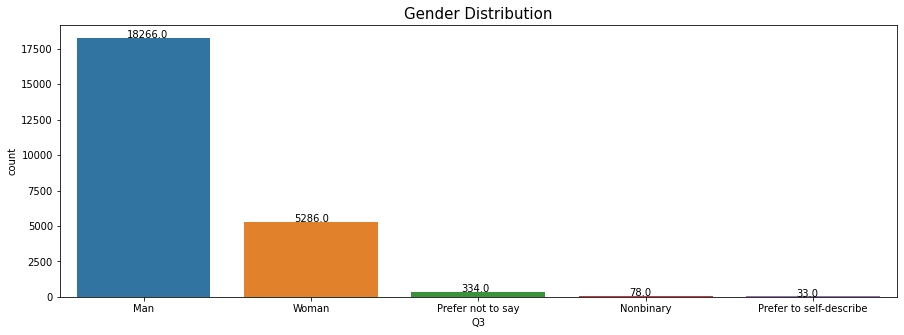

In [9]:
color_palette = sns.color_palette("tab10")
sns.set_palette(color_palette)
plt.figure(figsize=(15,5))
gender= sns.countplot(x=df["Q3"],order = df['Q3'].value_counts().index)
plt.title('Gender Distribution', fontsize=15)
for p in gender.patches:
   gender.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.30
                                                 , p.get_height()+0.10))

Text(0.5, 1.0, 'Country Distribution')

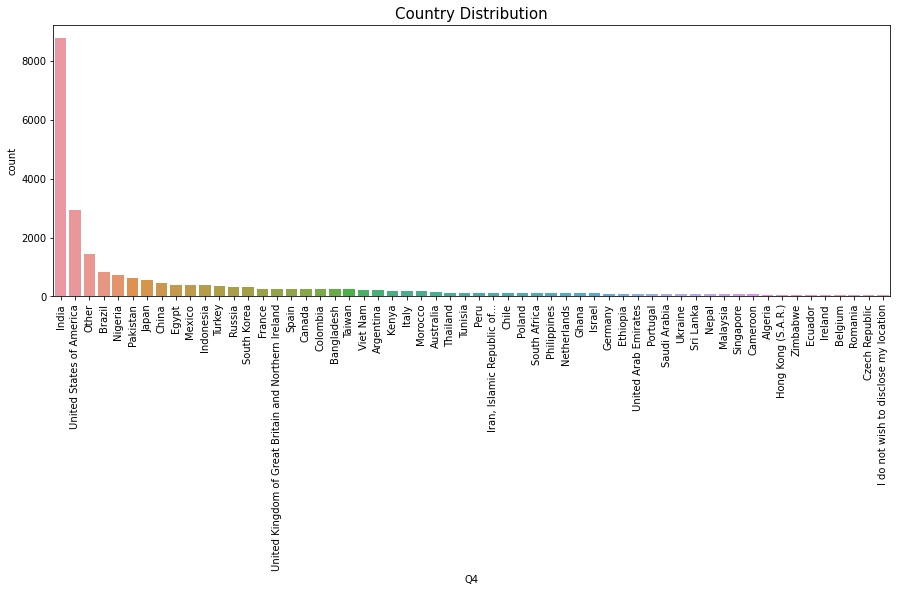

In [10]:
color_palette = sns.color_palette("tab10")
sns.set_palette(color_palette)
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
country= sns.countplot(x=df["Q4"],order= df['Q4'].value_counts().index)
plt.title('Country Distribution', fontsize=15)
# for p in country.patches:
#    country.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.30
#                                                  , p.get_height()+0.10))

In [11]:
platform_temp= pd.concat((df['Q6_1'],df['Q6_2'],df['Q6_3'],df['Q6_4'],df['Q6_5'],df['Q6_6']), axis=0)
platform= platform_temp.dropna()
platform

2        Coursera
3        Coursera
5        Coursera
7        Coursera
8        Coursera
           ...   
23938     Udacity
23956     Udacity
23972     Udacity
23983     Udacity
23995     Udacity
Length: 25662, dtype: object

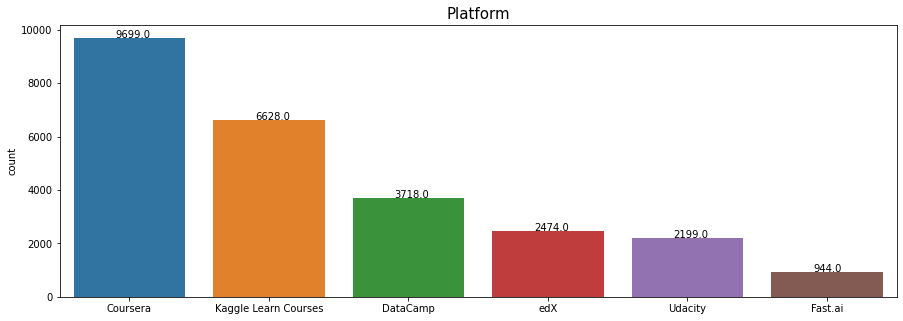

In [12]:
color_palette = sns.color_palette("tab10")
sns.set_palette(color_palette)
plt.figure(figsize=(15,5))
platform1= sns.countplot(x=platform,order= platform.value_counts().index)
plt.title('Platform', fontsize=15)
for p in platform1.patches:
   platform1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.30
                                                 , p.get_height()+0.10))

Text(0.5, 1.0, 'Bivariate Distribution- Gender and Age')

<Figure size 1080x288 with 0 Axes>

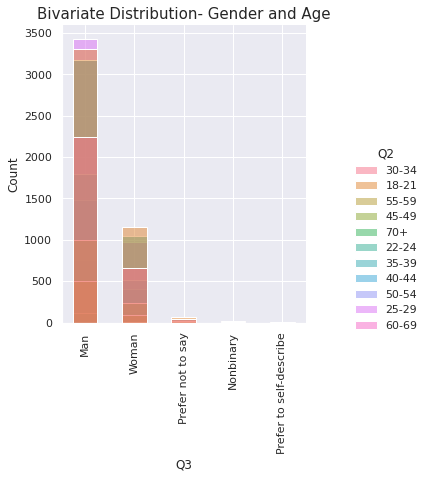

In [13]:
sns.set_theme(style="darkgrid")
color_palette = sns.color_palette("Set2")
sns.set_palette(color_palette)
plt.figure(figsize=(15,4))
bivar= sns.displot(df, x="Q3", hue="Q2",shrink=.5)
plt.xticks(rotation= 90)
plt.title('Bivariate Distribution- Gender and Age', fontsize=15)

In [15]:
platform= pd.DataFrame(platform)
plat_temp= platform.reset_index()
# plat_temp= plat_temp.drop('index')
gender_platform= pd.concat((plat_temp, df['Q3']), axis=1)
gender_platform_1= gender_platform[0]
gender_platform_2= gender_platform['Q3']
gender_platform= pd.concat((gender_platform_1, gender_platform_2), axis=1)
# gender_platform

Text(0.5, 1.0, 'Bivariate Distribution- Gender and Platform')

<Figure size 1080x288 with 0 Axes>

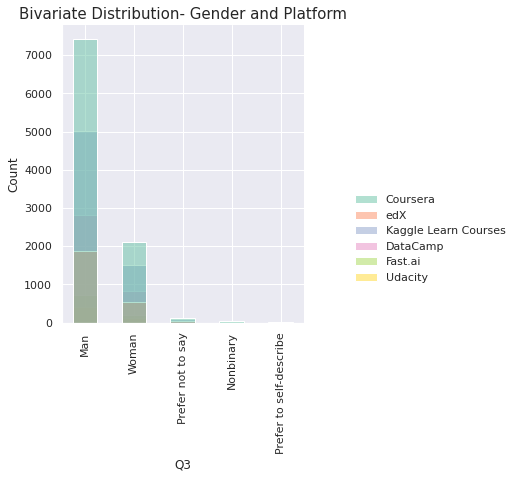

In [18]:
sns.set_theme(style="darkgrid")
color_palette = sns.color_palette("Set2")
sns.set_palette(color_palette)
plt.figure(figsize=(15,4))
bivar= sns.displot(gender_platform, x='Q3', hue=0,shrink=.5)
plt.xticks(rotation= 90)
plt.title('Bivariate Distribution- Gender and Platform', fontsize=15)

Text(0.5, 1.0, 'Years of Coding')

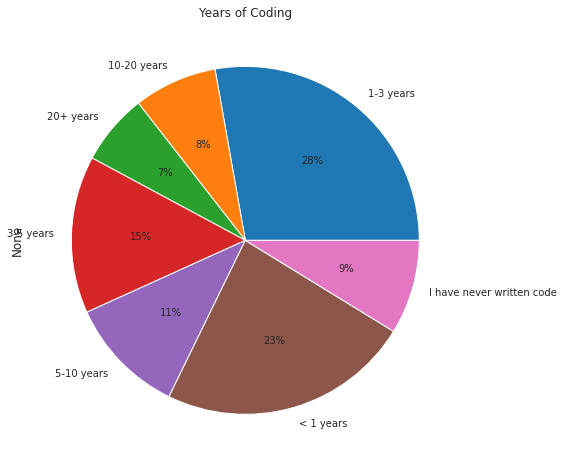

In [106]:
pie=df.groupby('Q11').size().plot(kind='pie', textprops={'fontsize': 10}, figsize=(12, 8),  autopct='%1.0f%%')
plt.title("Years of Coding")


In [23]:
from wordcloud import WordCloud

In [39]:
online= pd.concat((df['Q7_1'],df['Q7_2'],df['Q7_3'],df['Q7_4'],df['Q7_5'],df['Q7_6'],df['Q7_7']),axis=0)
online= online.dropna()
online

1        University courses
4        University courses
7        University courses
9        University courses
11       University courses
                ...        
23957                 Other
23966                 Other
23981                 Other
23986                 Other
23992                 Other
Length: 52412, dtype: object

In [47]:
text = online.values 
wordcloud = WordCloud().generate(str(text))
# wordcloud

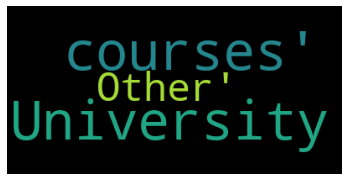

In [53]:
word_cloud = WordCloud(collocations = False, background_color = 'black').generate(str(text))

plt.imshow(word_cloud)
plt.axis("off")
plt.show()

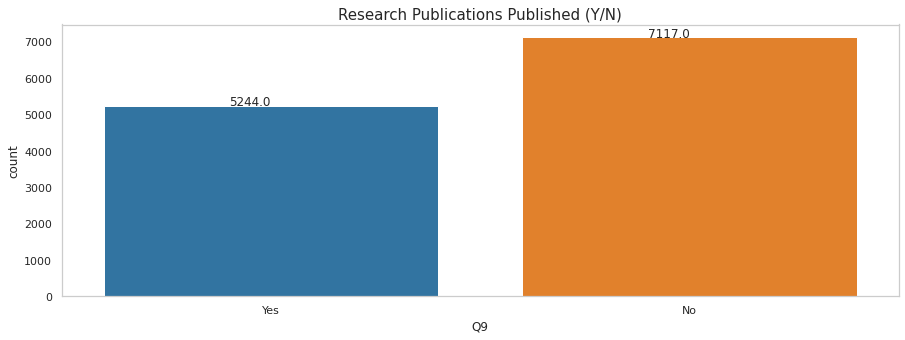

In [69]:
sns.set_theme(style="whitegrid")
color_palette = sns.color_palette("tab10")
sns.set_palette(color_palette)
plt.figure(figsize=(15,5))
# plt.xticks(rotation=90)
research= sns.countplot(x=df["Q9"])
plt.title('Research Publications Published (Y/N)', fontsize=15)
plt.grid(False)
for p in research.patches:
   research.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.30
                                                 , p.get_height()+0.10))

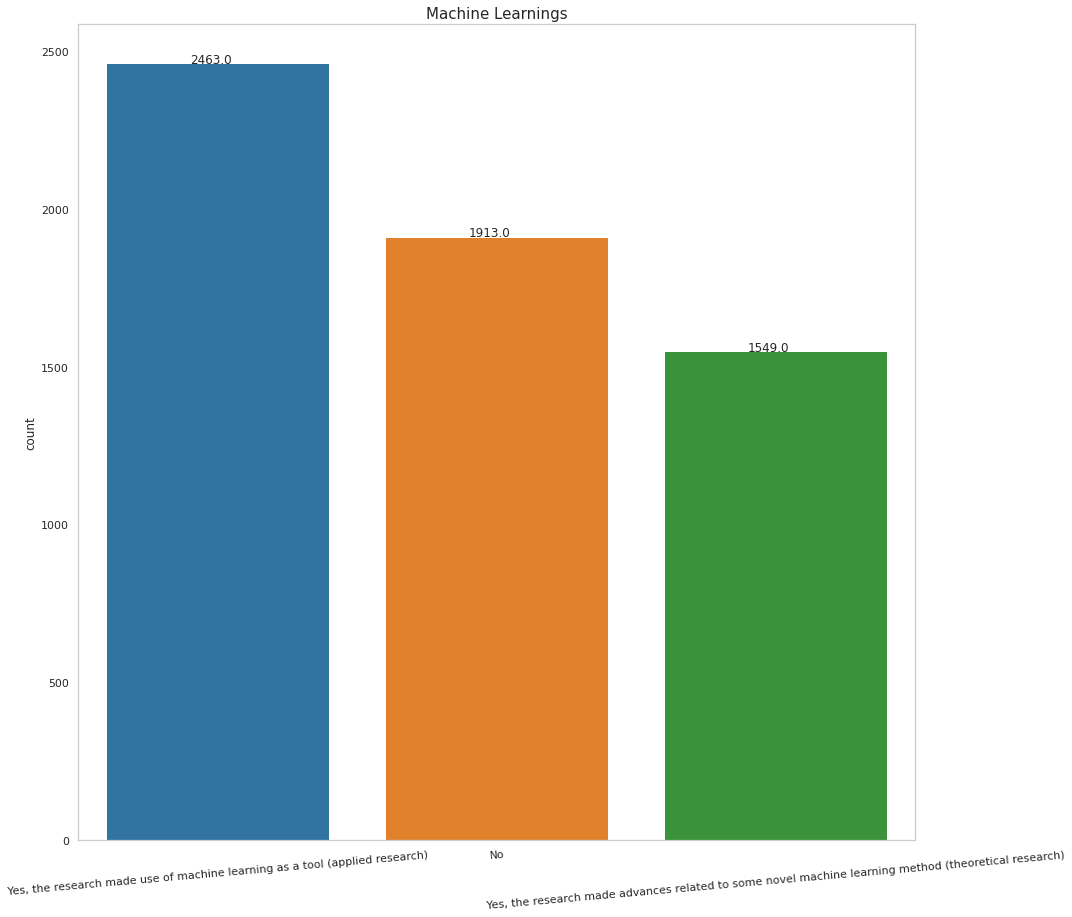

In [100]:
ml=pd.concat((df['Q10_1'],df['Q10_2'],df['Q10_3']),axis=0)
ml= ml.dropna()
sns.set_theme(style="whitegrid")
color_palette = sns.color_palette("tab10")
sns.set_palette(color_palette)
plt.figure(figsize=(15,15))
plt.xticks(rotation=5)
ml_cnt= sns.countplot(x=ml,order= ml.value_counts().index)
plt.title('Machine Learnings', fontsize=15)
plt.grid(False)
for p in ml_cnt.patches:
   ml_cnt.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.30
                                                 , p.get_height()+0.10))

Text(0.5, 1.0, 'ML Models Used')

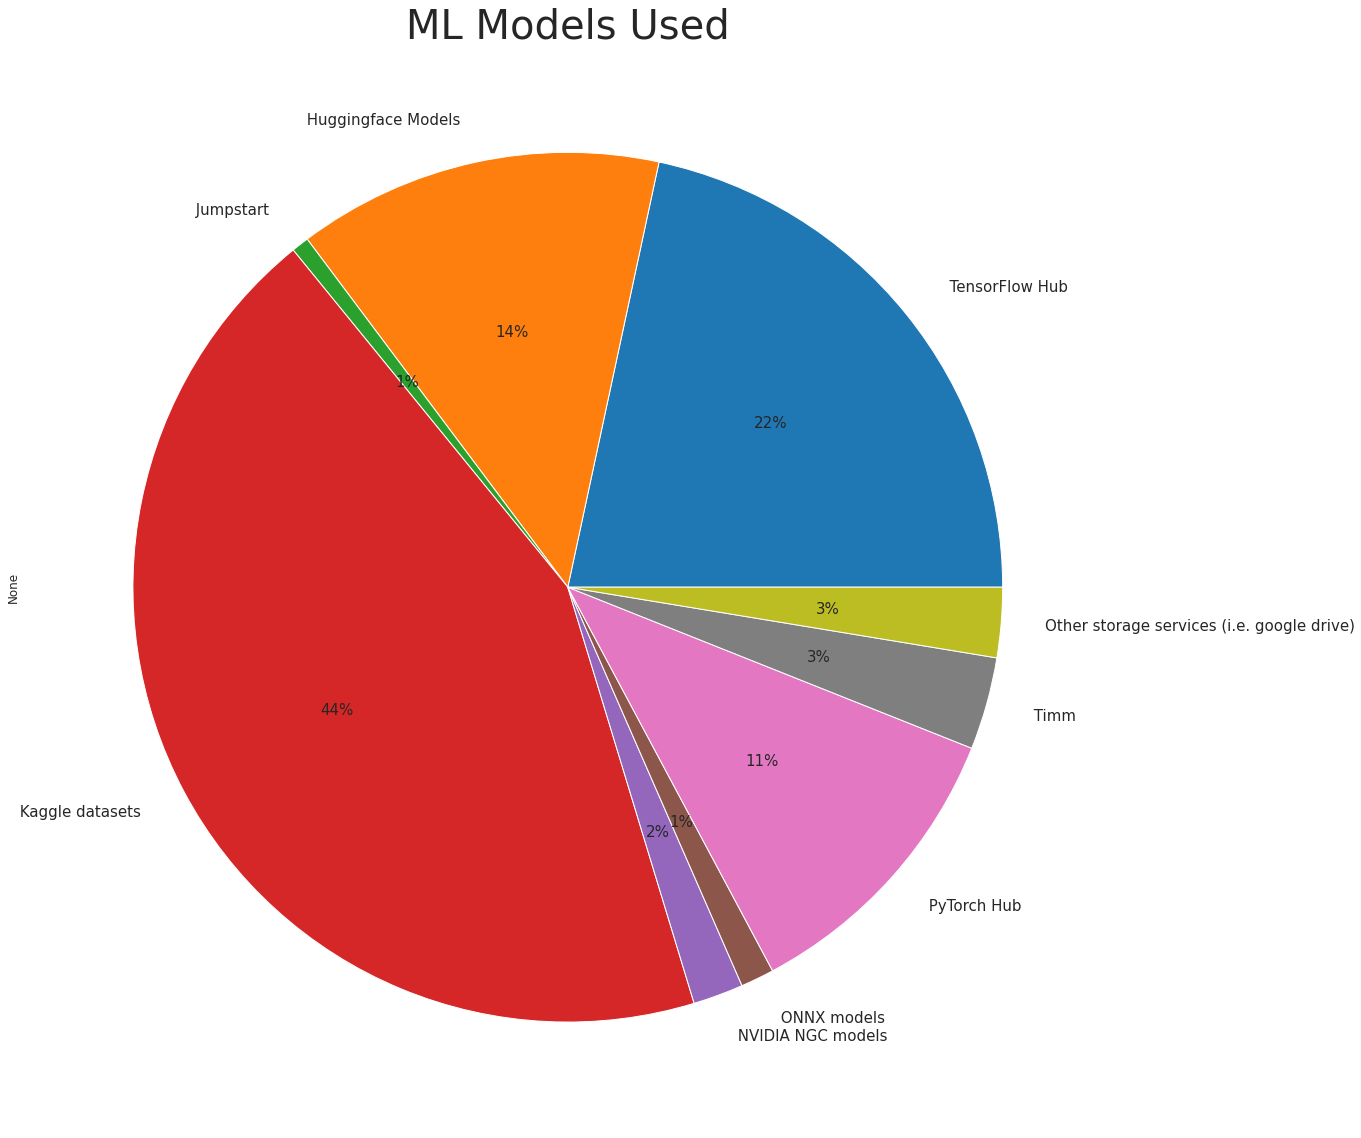

In [134]:
pie1=df.groupby('Q22').size().plot(kind='pie', textprops={'fontsize': 15}, figsize=(20,20),  autopct='%1.0f%%')
plt.title("ML Models Used", fontsize = 40)

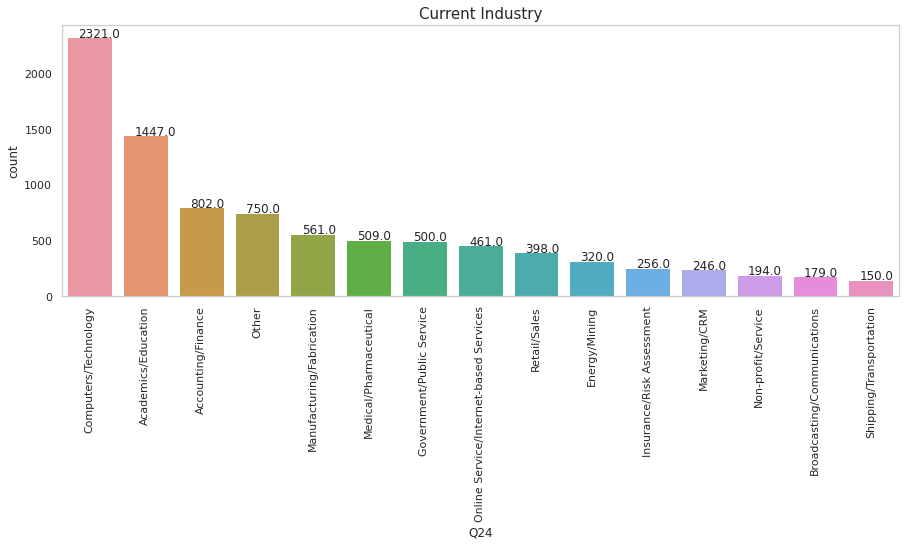

In [129]:
industry=df["Q24"] 
sns.set_theme(style="whitegrid")
color_palette = sns.color_palette("tab10")
sns.set_palette(color_palette)
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
industry_plt= sns.countplot(x=industry,order= industry.value_counts().index)
plt.title('Current Industry', fontsize=15)
plt.grid(False)
for p in industry_plt.patches:
   industry_plt.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.20
                                                 , p.get_height()+0.10))